In [2]:
!pip install pybaobabdt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

In [4]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import graphviz
import pybaobabdt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
attrition = pd.read_excel('/content/drive/My Drive/DAT650/EmployeeAttritionData.xlsx', index_col = "EmployeeNumber")

In [6]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [7]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#Checking for missing values

attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [9]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [11]:
#dropping unneeded columns and columns that could introduce bias
attrition.drop(["EmployeeCount", "StandardHours", "Gender", "Age", "Over18", "MaritalStatus"],axis =1, inplace = True)

In [12]:
attrition.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Hot Encoding the variables

In [13]:
attrition_encoded = attrition.replace(to_replace={'BusinessTravel': {'Non-Travel': 1,
                                                                     'Travel_Frequently':2, 
                                                                     'Travel_Rarely': 3 }})

In [14]:
attrition_encoded = attrition_encoded.replace(to_replace = {"Department": {"Human Resources": 1, 
                                                                   "Research & Development": 2,
                                                                  "Sales": 3}})

In [15]:
attrition_encoded = attrition_encoded.replace(to_replace = {"EducationField": {"Human Resources": 1, 
                                                                               "Life Sciences": 2,
                                                                                "Marketing": 3,
                                                                              "Medical": 4,
                                                                              "Other": 5,
                                                                              "Technical Degree": 6}})

In [16]:
attrition_encoded = attrition_encoded.replace(to_replace = {"JobRole": {"Healthcare Representative": 1, 
                                                                        "Human Resources": 2,
                                                                        "Manager": 3,
                                                                        "Manufacturing Director": 4,
                                                                        "Research Director": 5,
                                                                        "Research Scientist": 6,
                                                                       "Sales Executive": 7,
                                                                       "Sales Representative": 8,
                                                                       "Laboratory Technician": 9}})

In [17]:
attrition_encoded = attrition_encoded.replace(to_replace = {"OverTime": {"Yes": 1, 
                                                                           "No": 2}})

In [18]:
attrition_encoded = attrition_encoded.replace(to_replace = {"Attrition": {"Yes": 1, 
                                                                           "No": 2}})

## Quick visualization to show variables

In [21]:
px.box(attrition_encoded, title = "Box Plot")

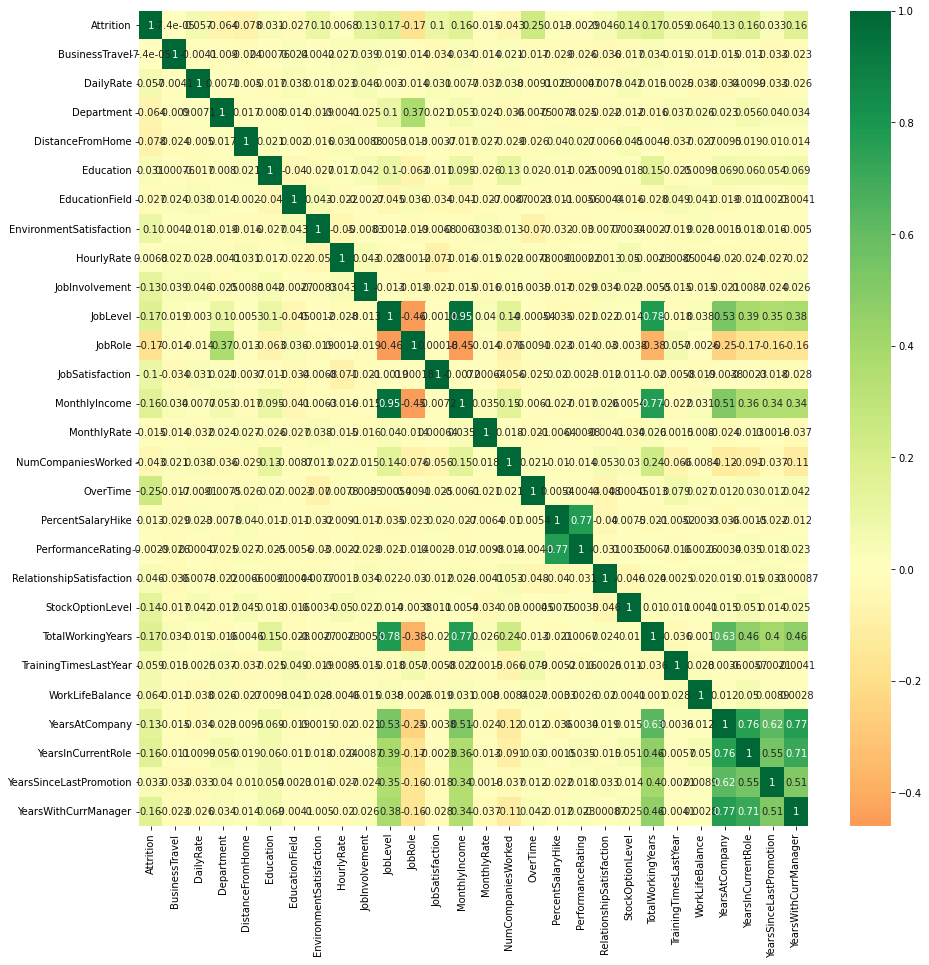

In [22]:
#Correlation matrix of all the variables

plt.figure(figsize=(15,15))
p=sns.heatmap(attrition_encoded.corr(), annot=True,cmap='RdYlGn',center=0) 

# Prepping for modeling by splitting into testing and training

In [23]:
#Splitting the data into X and y variables
X = attrition_encoded.drop(['Attrition'],axis=1)
y = attrition_encoded.Attrition

In [24]:
#splitting the dataset into testing the training, 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
X_train.columns

Index(['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from statistics import mean

Testing to determine what the best random forest will be

In [27]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,20,40,100],
    "max_depth":[2,4,8,16,32,None]
    
}

In [28]:
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 20, 40, 100]})

In [29]:
#calculating the best parameters for a random forest classifier

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [30]:
display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 20}


0.84 + or -0.002 for the {'max_depth': 2, 'n_estimators': 5}
0.84 + or -0.002 for the {'max_depth': 2, 'n_estimators': 10}
0.84 + or -0.002 for the {'max_depth': 2, 'n_estimators': 20}
0.84 + or -0.002 for the {'max_depth': 2, 'n_estimators': 40}
0.84 + or -0.002 for the {'max_depth': 2, 'n_estimators': 100}
0.849 + or -0.006 for the {'max_depth': 4, 'n_estimators': 5}
0.851 + or -0.004 for the {'max_depth': 4, 'n_estimators': 10}
0.85 + or -0.005 for the {'max_depth': 4, 'n_estimators': 20}
0.846 + or -0.003 for the {'max_depth': 4, 'n_estimators': 40}
0.848 + or -0.005 for the {'max_depth': 4, 'n_estimators': 100}
0.848 + or -0.016 for the {'max_depth': 8, 'n_estimators': 5}
0.849 + or -0.005 for the {'max_depth': 8, 'n_estimators': 10}
0.861 + or -0.01 for the {'max_depth': 8, 'n_estimators': 20}
0.853 + or -0.013 for the {'max_depth': 8, 'n_estimators': 40}
0.856 + or -0.011 for the {'max_depth': 8, 'n_estimators': 100}
0.

Running the Random Forest with the best parameters

In [31]:
clf=RandomForestClassifier(n_estimators=20, random_state = 0)

In [32]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [33]:
scoring = ('recall', 'precision')

scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv)
#print('Mean f1: %.3f' % mean(scores['test_f1']))

In [34]:
scores

{'fit_time': array([0.08864713, 0.05680442, 0.05768657, 0.07025886, 0.06460238,
        0.06341052, 0.05922008, 0.06123066, 0.05578971, 0.05933857,
        0.06911755, 0.06890512, 0.05806255, 0.06032872, 0.064569  ,
        0.06165624, 0.06170535, 0.06254125, 0.06242847, 0.06104183,
        0.06503177, 0.05944943, 0.06076717, 0.0606997 , 0.06034088,
        0.06486845, 0.05902839, 0.05872798, 0.05778813, 0.06351447]),
 'score_time': array([0.00843883, 0.00751257, 0.00702739, 0.00745034, 0.01275492,
        0.00726604, 0.00667644, 0.00737333, 0.00687766, 0.00663185,
        0.00978494, 0.00659013, 0.00761724, 0.00871372, 0.00660348,
        0.00722456, 0.00692558, 0.00671315, 0.00753021, 0.0080862 ,
        0.00764799, 0.00761414, 0.01422119, 0.00650668, 0.00658154,
        0.00656581, 0.00824952, 0.00655913, 0.00728798, 0.00649357]),
 'test_precision': array([0.4       , 0.375     , 0.5       , 0.75      , 0.7       ,
        1.        , 0.27272727, 0.4       , 0.85714286, 0.66666667,


In [35]:
print('Mean Recall: %.3f' % mean(scores['test_recall']))
print('Mean Precision: %.3f' % mean(scores['test_precision']))

Mean Recall: 0.214
Mean Precision: 0.650


In [36]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [37]:
y_pred=clf.predict(X_test)

Accuracy: 0.8537414965986394


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'Standard Random Forest Confusion Matrix')

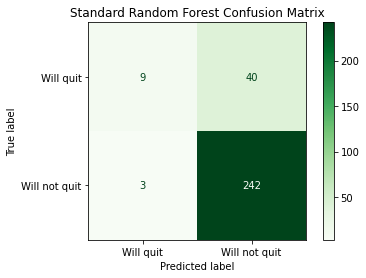

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fig = plot_confusion_matrix(clf, X_test, y_test, display_labels=['Will quit', 'Will not quit'], cmap='Greens')
plt.title('Standard Random Forest Confusion Matrix')

Using Oversampling to try to correct the imbalance

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
#Prepping it for the random forest
X_unencoded = attrition.drop(['Attrition'],axis=1)
y_unencoded = attrition.Attrition

In [41]:
#using SMOTE to oversample
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)

In [42]:
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=20, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

Mean f1: 0.911
Mean recall: 0.908
Mean precision: 0.916


In [43]:
SMOTE_SRF.fit(over_X_train,over_y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [44]:
y_pred = SMOTE_SRF.predict(X_test)

Accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'SMOTE + Standard Random Forest Confusion Matrix')

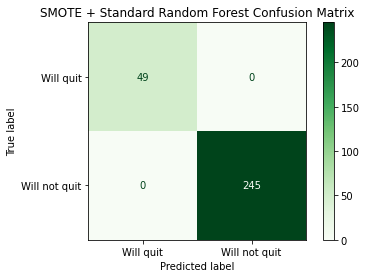

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=['Will quit', 'Will not quit'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')

In [46]:
#Feature Importance
feature_imp = pd.Series(SMOTE_SRF.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

OverTime                    0.165539
MonthlyIncome               0.071872
StockOptionLevel            0.067203
JobSatisfaction             0.062142
EnvironmentSatisfaction     0.046579
JobInvolvement              0.044243
MonthlyRate                 0.040629
DailyRate                   0.039380
RelationshipSatisfaction    0.038375
HourlyRate                  0.034367
TotalWorkingYears           0.033904
DistanceFromHome            0.032983
JobLevel                    0.031433
YearsAtCompany              0.030285
YearsInCurrentRole          0.027889
YearsWithCurrManager        0.027032
JobRole                     0.025694
WorkLifeBalance             0.025446
Education                   0.025246
TrainingTimesLastYear       0.023016
NumCompaniesWorked          0.020876
PercentSalaryHike           0.020352
BusinessTravel              0.018775
YearsSinceLastPromotion     0.018176
EducationField              0.015788
Department                  0.008748
PerformanceRating           0.004027
d

Feature Importance Graph

In [47]:
fig = px.bar(feature_imp, title = "Feature Importance", orientation = "h")
fig.update_layout(showlegend = False)
fig.update_xaxes(title = "Importance")
fig.update_yaxes(title = "Feature")

Using the pybaobabdt library to visualize the trees that we created

In [48]:
features1 = list(X_train.columns)

size = (15,15)
plt.rcParams['figure.figsize'] = size
fig = plt.figure(figsize=size, dpi=300)

for idx, tree in enumerate(SMOTE_SRF.estimators_):
    ax1 = fig.add_subplot(5, 4, idx+1)
    pybaobabdt.drawTree(tree, model=SMOTE_SRF, size=15, dpi=300, features=features1, ax=ax1)
    
fig.savefig('random-forest.png', format='png', dpi=1200, transparent=True)

Output hidden; open in https://colab.research.google.com to view.

# Decision Tree

In [49]:
from sklearn import tree

In [50]:
tree1 = tree.DecisionTreeClassifier()
tree1 = tree1.fit(X_train,y_train)

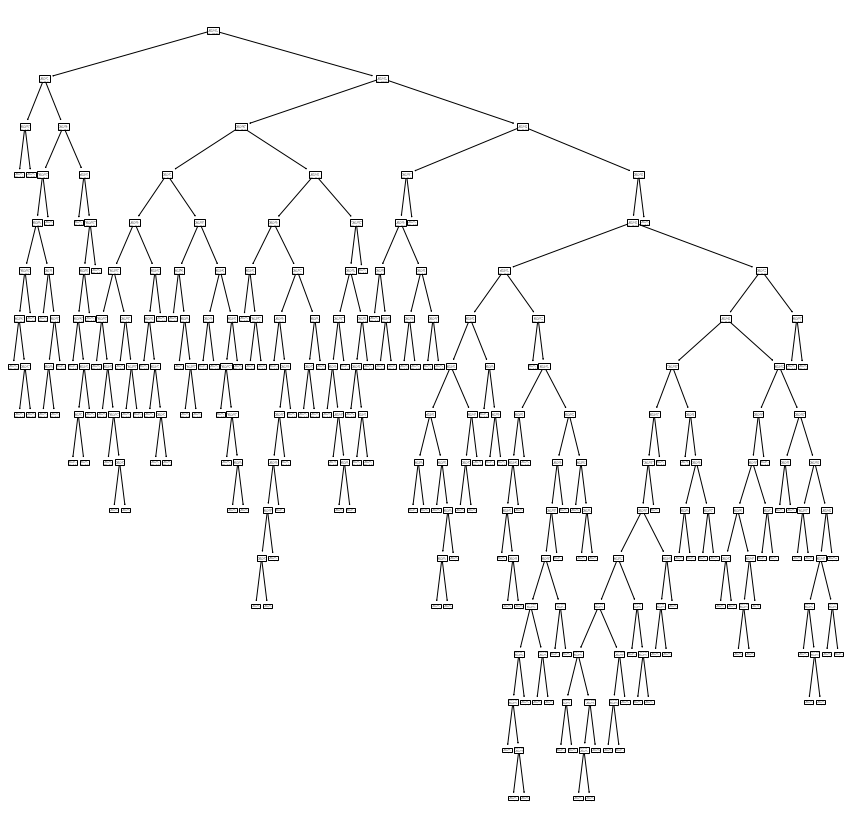

In [51]:
treeplot = tree.plot_tree(tree1)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 1 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 0 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2 missing from current font.



<Figure size 1080x1080 with 0 Axes>

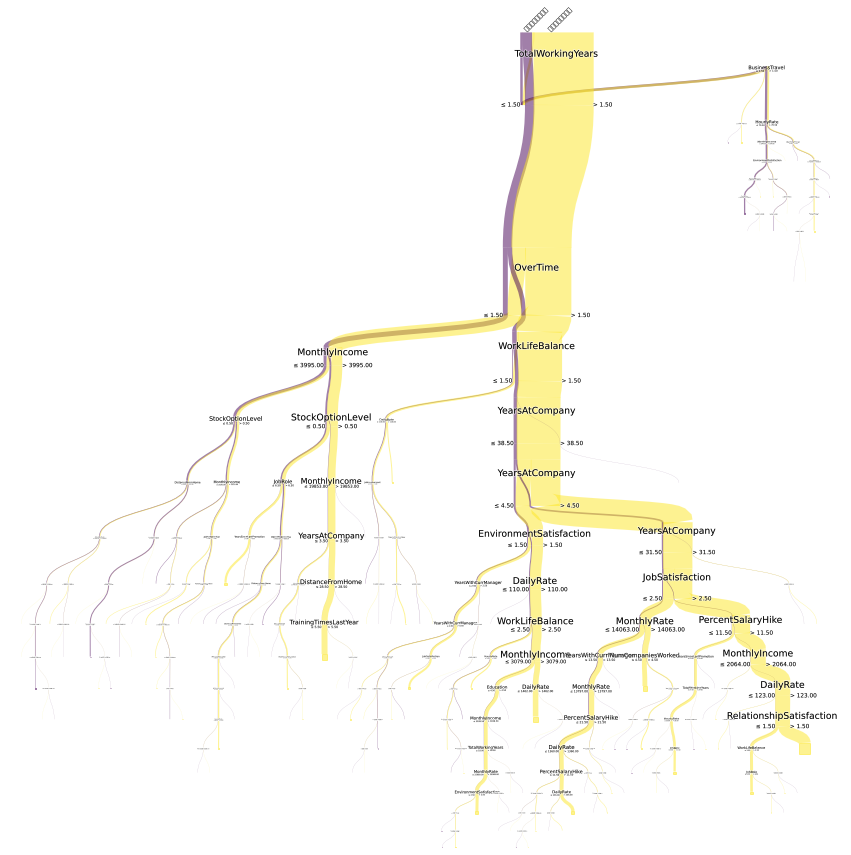

In [52]:
features = list(X_train.columns)

ax = pybaobabdt.drawTree(tree1, size=15, dpi=72, features=features)
